# Feature Analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import ast

In [2]:
df = pd.read_csv("Original Data/Train.csv")

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5548 entries, 0 to 5547
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5548 non-null   str    
 1   gender                   5548 non-null   str    
 2   age                      5548 non-null   str    
 3   registration             5548 non-null   str    
 4   belong_to_cooperative    5548 non-null   int64  
 5   county                   5548 non-null   str    
 6   subcounty                5548 non-null   str    
 7   ward                     5548 non-null   str    
 8   trainer                  5548 non-null   str    
 9   first_training_date      5548 non-null   str    
 10  topics_list              5548 non-null   str    
 11  num_total_trainings      5548 non-null   int64  
 12  num_repeat_trainings     5548 non-null   int64  
 13  days_to_second_training  3531 non-null   float64
 14  num_unique_trainers      5548 non-n

In [28]:
for col in df.columns:
    null_values = df[col].isna().sum()
    if null_values: 
        print(f"{col}: {null_values}")

days_to_second_training: 2017


In [26]:
problematic_rows = df[(df['num_total_trainings'] > 1) & (df["days_to_second_training"].isna())]
print(len(problematic_rows))

0


In [18]:
similarity_count = 0
diff = 0

for i, row in df.iterrows():
    if int(row["num_total_trainings"]) - 1 == int(row["num_repeat_trainings"]):
        similarity_count += 1
    else:
        diff += 1

print(similarity_count)
print(diff)


5548
0


In [12]:
df.head()

,ID,gender,age,registration,belong_to_cooperative,county,subcounty,ward,trainer,first_training_date,topics_list,num_total_trainings,num_repeat_trainings,days_to_second_training,num_unique_trainers,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days,has_second_training
0,ID_A2UAZE,Female,Below 35,Ussd,0,Bungoma,Bumula,Kabula,trainer_name_2,2024-02-23,"['Ndume App,Poultry Feeding']",1,0,NaN,1,0,0,0,0
1,ID_RM2GTJ,Female,Below 35,Ussd,0,Bungoma,Bumula,Kabula,trainer_name_2,2024-02-24,"['Herd Management,Ndume App,Poultry Feeding,Po...",1,0,NaN,1,0,0,0,0
2,ID_5J3VCK,Male,Above 35,Ussd,0,Nyamira,North Mugirango,Bomwagamo,trainer_name_4,2024-02-21,"['Disadvantages Of Natural Mating', 'Poultry F...",39,38,0.0,1,1,1,1,1
3,ID_2PGL0A,Female,Above 35,Manual,0,Nyamira,North Mugirango,Bomwagamo,trainer_name_4,2024-02-29,"['Factors Affecting Milk Production', 'Factors...",301,300,0.0,1,1,1,1,1
4,ID_K1XGMR,Female,Above 35,Ussd,0,Nyamira,North Mugirango,Bomwagamo,trainer_name_4,2024-02-28,"['Disadvantages Of Natural Mating', 'Poultry F...",19,18,0.0,1,0,0,0,1


In [7]:
df.corr(numeric_only=True)

,belong_to_cooperative,num_total_trainings,num_repeat_trainings,days_to_second_training,num_unique_trainers,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days,has_second_training
belong_to_cooperative,1.000000,0.006914,0.006914,-0.066910,NaN,0.160058,0.134842,0.127919,-0.048039
num_total_trainings,0.006914,1.000000,1.000000,-0.031881,NaN,0.393165,0.365346,0.354958,0.238353
num_repeat_trainings,0.006914,1.000000,1.000000,-0.031881,NaN,0.393165,0.365346,0.354958,0.238353
days_to_second_training,-0.066910,-0.031881,-0.031881,1.000000,NaN,-0.055197,-0.057161,-0.057715,NaN
num_unique_trainers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adopted_within_07_days,0.160058,0.393165,0.393165,-0.055197,NaN,1.000000,0.924681,0.904247,0.215539
adopted_within_90_days,0.134842,0.365346,0.365346,-0.057161,NaN,0.924681,1.000000,0.977901,0.169412
adopted_within_120_days,0.127919,0.354958,0.354958,-0.057715,NaN,0.904247,0.977901,1.000000,0.153559
has_second_training,-0.048039,0.238353,0.238353,NaN,NaN,0.215539,0.169412,0.153559,1.000000


<Axes: >

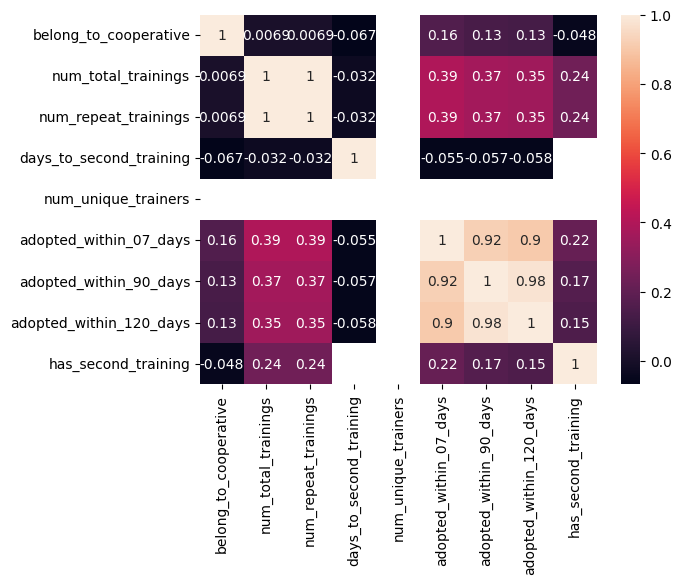

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

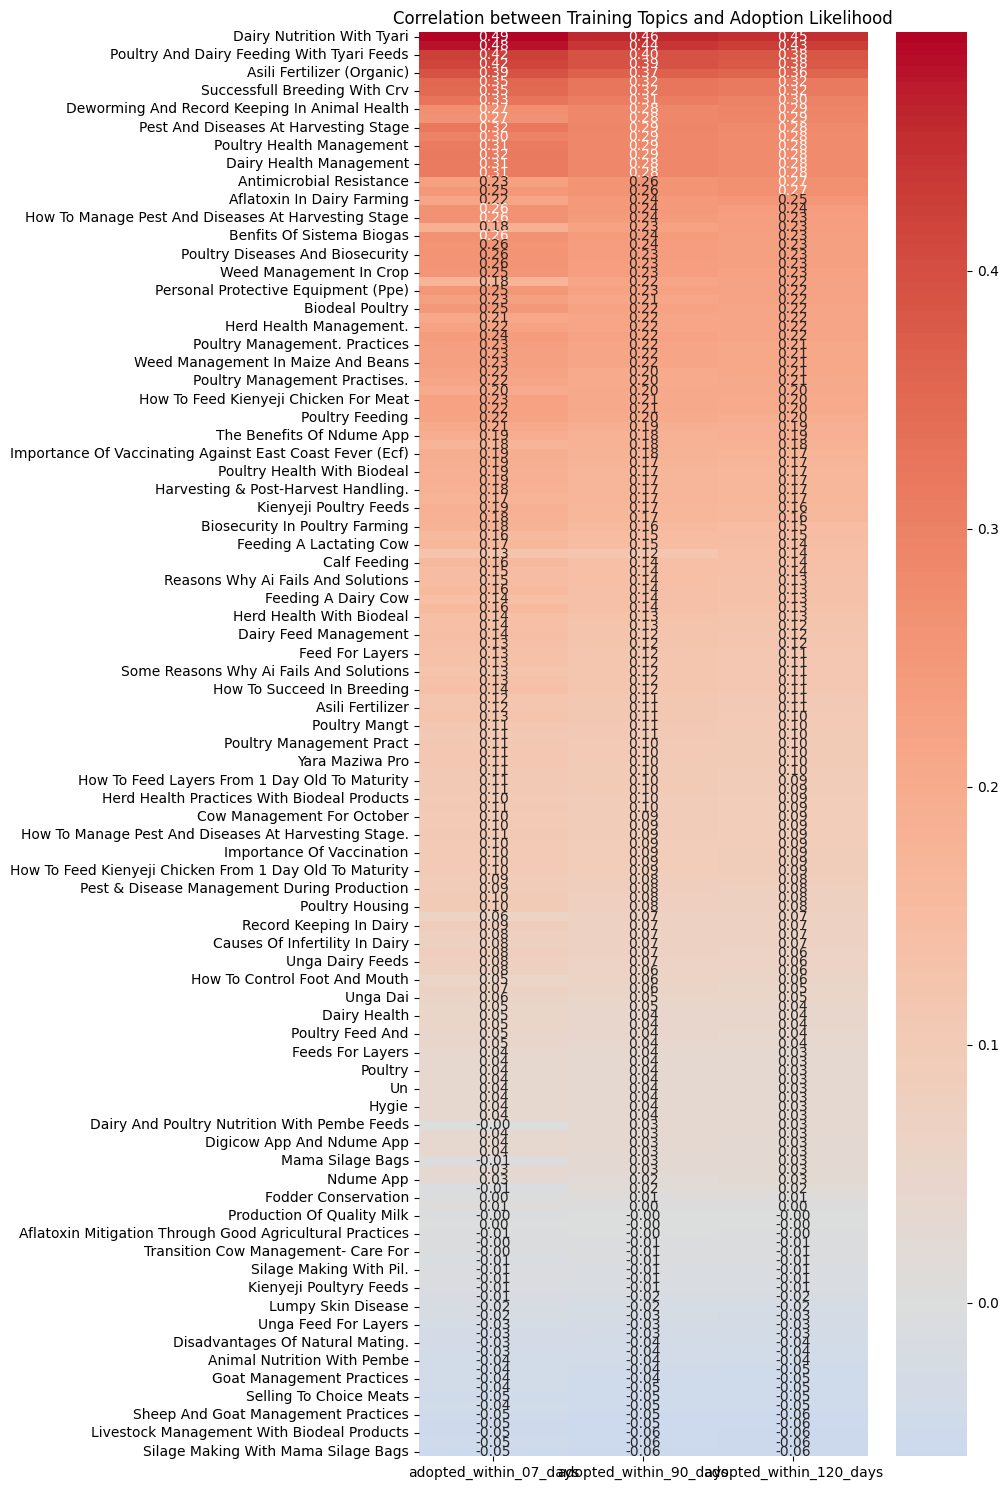

In [15]:
def parse_topics(topic_str):
    try:
        raw_list = ast.literal_eval(topic_str)
        
        final_topics = []
        for item in raw_list:

            if ',' in item:
                split_items = [x.strip() for x in item.split(',')]
                final_topics.extend(split_items)
            else:
                final_topics.append(item.strip())
        return final_topics
    except:
        return []

df['clean_topics'] = df['topics_list'].apply(parse_topics)

topics_expanded = df.explode('clean_topics')
topics_dummies = pd.get_dummies(topics_expanded['clean_topics'])
# Group back by index to get one row per original observation
topics_encoded = topics_dummies.groupby(topics_expanded.index).sum()
# 4. Combine with target variables
targets = ['adopted_within_07_days', 'adopted_within_90_days', 'adopted_within_120_days']
analysis_df = pd.concat([df[targets], topics_encoded], axis=1)
# 5. Calculate Correlation
correlation_matrix = analysis_df.corr(numeric_only=True)
# Filter to show only correlation between Topics and Targets
# Rows = Topics, Columns = Targets
topic_target_corr = correlation_matrix.loc[topics_encoded.columns, targets]
# Sort by one of the targets to make it easier to read
topic_target_corr = topic_target_corr.sort_values(by='adopted_within_120_days', ascending=False)
# 6. Plot Heatmap
plt.figure(figsize=(10, 15)) # Tall figure to fit all topics
sns.heatmap(topic_target_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation between Training Topics and Adoption Likelihood')
plt.tight_layout()
plt.show()